# Sampling _ inbalanced_data

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Sample_Dataset.csv")

In [3]:
data

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f26,f27,f28,f29,f30,f31,f32,f33,f34,obj1
0,1,1,17.2131,1,1.0,1,3,2,3,1,...,NaN,1.0,9.0,1,40.0,13.0,32.766370,NaN,NaN,0
1,2,35,0.1747,1,1.0,2,1,1,2,2,...,12.0,1.0,10.0,1,12.0,23.0,210.567669,NaN,NaN,0
2,3,1,35.3943,1,NaN,2,2,2,2,2,...,30.0,1.0,9.0,1,24.0,16.0,0.000111,NaN,NaN,1
3,4,1,4.4873,1,1.0,1,1,1,2,1,...,NaN,1.0,9.0,1,36.0,7.0,9.380889,NaN,NaN,0
4,5,1,NaN,1,NaN,1,1,1,1,1,...,30.0,1.0,10.0,1,12.0,20.0,28.089135,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,4524,29,5.7576,1,1.0,3,2,2,2,1,...,NaN,NaN,10.0,1,NaN,32.0,236.170700,NaN,63.0541,0
4524,4525,2,107.7430,1,1.0,3,4,3,1,1,...,18.0,NaN,13.0,1,48.0,27.0,2.799800,NaN,NaN,1
4525,4526,1,1.9364,1,1.0,4,7,4,4,1,...,NaN,NaN,NaN,1,NaN,NaN,205.806400,NaN,15.9357,1
4526,4527,1,7.6795,1,3.0,2,4,2,2,2,...,30.0,NaN,10.0,1,60.0,10.0,1.658700,533.0,NaN,0


In [4]:
data.isnull().any().sum()

17

In [5]:
data.isnull().sum()

id         0
f1         0
f2       702
f3         0
f4       113
f5         0
f6         0
f7         0
f8         0
f9         0
f10     4257
f11        0
f12      102
f13        0
f14        0
f15        0
f16        0
f17       81
f18        0
f19        6
f20        0
f21       81
f22        0
f23        0
f24       81
f25       58
f26      373
f27       85
f28       34
f29        0
f30      352
f31      102
f32      125
f33     4465
f34     4303
obj1       0
dtype: int64

In [6]:
data.isnull().sum().sum() 

15320

In [7]:
from sklearn.impute import SimpleImputer
imputer_1 = SimpleImputer(strategy='mean')                   # i am trying to fill null value by using mean   for every column
#imputer_1 = SimpleImputer(strategy='median')                # fill null value by using median
#imputer_1 = SimpleImputer(strategy='most_frequent')         # fill null value by using mod 

In [8]:
imputer_1.fit(data)            
data= imputer_1.transform(data)        

In [9]:
data= pd.DataFrame(data)                     # lets convert  into pandas dataframe

In [10]:
data.isnull().sum().sum()                     # there is no null value

0

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,1.0,17.213100,1.0,1.00000,1.0,3.0,2.0,3.0,1.0,...,33.13911,1.0,9.0,1.0,40.0,13.0,32.766370,226.619048,67.104424,0.0
1,2.0,35.0,0.174700,1.0,1.00000,2.0,1.0,1.0,2.0,2.0,...,12.00000,1.0,10.0,1.0,12.0,23.0,210.567669,226.619048,67.104424,0.0
2,3.0,1.0,35.394300,1.0,1.17735,2.0,2.0,2.0,2.0,2.0,...,30.00000,1.0,9.0,1.0,24.0,16.0,0.000111,226.619048,67.104424,1.0
3,4.0,1.0,4.487300,1.0,1.00000,1.0,1.0,1.0,2.0,1.0,...,33.13911,1.0,9.0,1.0,36.0,7.0,9.380889,226.619048,67.104424,0.0
4,5.0,1.0,94.969574,1.0,1.17735,1.0,1.0,1.0,1.0,1.0,...,30.00000,1.0,10.0,1.0,12.0,20.0,28.089135,226.619048,67.104424,0.0


In [12]:
data[35].value_counts()

0.0    3694
1.0     834
Name: 35, dtype: int64

In [13]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [14]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
4523    0.0
4524    1.0
4525    1.0
4526    0.0
4527    1.0
Name: 35, Length: 4528, dtype: float64

In [15]:
from collections import Counter
# summarize class distribution
print(Counter(y))

Counter({0.0: 3694, 1.0: 834})


# first without doing sampling,  use LogisticRegression

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)


from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(x_train,y_train)
predicted_classes = model.predict(x_test)

C:\Users\NAFEES AHMAD\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.metrics import confusion_matrix
results= confusion_matrix(y_test, predicted_classes)
print('confusion Matrix : ')
print(results)

confusion Matrix : 
[[1244    1]
 [ 265    0]]


In [19]:
recall = (0) / (265+0)
print(recall)

0.0


In [20]:
pre = (0) / (0+1)
print(pre)

0.0


In [21]:
acc=(0+1244)/(1244+0+1+265)
print(acc)

0.823841059602649


# Let's do the sampling

In [22]:
#pip install imblearn

In [23]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# OverSampler

In [24]:
# define oversampling strategy

k = RandomOverSampler(sampling_strategy='minority')     # take minority to imrove

In [62]:
# fit and apply the transform

X_over, y_over = k.fit_resample(x_train, y_train)

In [63]:
# summarize class distribution
print(Counter(y_over))

Counter({1.0: 2449, 0.0: 2449})


In [69]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, predicted_classes)
print ('Confusion Matrix :')
print(results)


Confusion Matrix :
[[1244    1]
 [ 265    0]]


In [70]:
recall = (473) / (473+345 )
print(recall)

0.578239608801956


In [71]:
pre = (345 ) / (345 +353)
print(pre)

0.49426934097421205


In [72]:
acc=(462 +473)/(462 +473+345+353)
print(acc)

0.5725658297611758


# UnderSampler

In [73]:
from imblearn.under_sampling import RandomUnderSampler

In [77]:
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
x_under, y_under = undersample.fit_resample(x_train, y_train)

In [78]:
# summarize class distribution
print(Counter(y_over))

Counter({1.0: 2449, 0.0: 2449})


# Sensitive_Learning

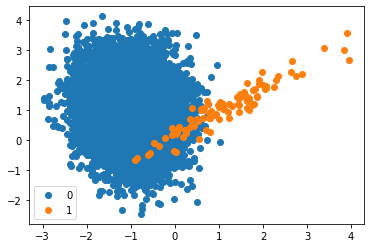

In [35]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [114]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [115]:
model = LogisticRegression(solver='lbfgs')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.985


In [116]:
model = LogisticRegression(solver='lbfgs')
model.fit(X,y)
pr=model.predict(X)

In [117]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y, pr) 
print ('Confusion Matrix :')
print(results) 


Confusion Matrix :
[[9897    3]
 [  40   60]]


In [118]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [119]:
weights = {0:1.0, 1:100}
model = LogisticRegression(solver='lbfgs', class_weight=weights)

In [120]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.989


In [121]:
weights = {0:0.01, 1:1}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X,y)
pr=model.predict(X)

In [122]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y, pr) 
print ('Confusion Matrix :')
print(results) 


Confusion Matrix :
[[9317  583]
 [   5   95]]


In [123]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.datasets import make_classification
weighting = compute_class_weight('balanced', [0,1], y)
print(weighting)

TypeError: compute_class_weight() takes 1 positional argument but 3 were given

In [124]:
weights = {0:0.50505051, 1:50.0}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X,y)
pr=model.predict(X)

In [125]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y, pr) 
print ('Confusion Matrix :')
print(results) 


Confusion Matrix :
[[9310  590]
 [   5   95]]


In [126]:
model = LogisticRegression(solver='lbfgs', class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.989


In [127]:
model = LogisticRegression(solver='lbfgs', class_weight='balanced')
model.fit(X,y)
pr=model.predict(X)
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y, pr) 
print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[9310  590]
 [   5   95]]
